# Analyse of equivalent width

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : April 7th  2022
- last update : 


### Configuration Hb :

    


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

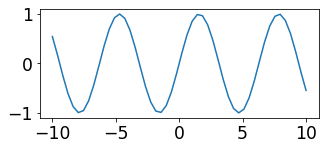

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-04-08'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.2.0'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, HGAMMA, HDELTA,HEPSILON,O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

# Function

In [16]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [17]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [19]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [20]:
# path index for each month
DATE="20220317"

# Input file

In [21]:
!ls data

equivwidth_20220316_configH.csv  equivwidth_20220317_configHb.csv


In [22]:
df_infos = pd.read_csv("data/equivwidth_20220317_configHb.csv")

### Info on equivalent width summary

In [23]:
df_infos

,idx,num,object,date_obs,airmass,temperature,pressure,humidity,reftime,eqw_h2o,...,eqw_o2b,eqw_halpha,eqw_hbeta,eqw_hgamma,eqw_h2o_err,eqw_o2_err,eqw_o2b_err,eqw_halpha_err,eqw_hbeta_err,eqw_hgamma_err
0,0,238,mu. Col,2022-03-18T00:51:22.049,1.115575,8.9,743.45,48.0,0.000000,123.484478,...,11.571888,4.209068,2.033181,3.503225,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
1,1,244,mu. Col,2022-03-18T00:54:16.312,1.121577,8.9,743.45,49.0,0.048406,128.921038,...,11.630822,4.366678,2.082311,3.606314,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
2,2,245,mu. Col,2022-03-18T00:54:49.235,1.122727,8.8,743.40,49.0,0.057552,119.048378,...,11.281436,4.448080,1.918250,3.175584,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
3,3,251,mu. Col,2022-03-18T00:57:47.565,1.129107,8.9,743.40,50.0,0.107088,131.327724,...,0.791031,0.213250,-2.914306,-3.373072,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
4,4,252,mu. Col,2022-03-18T00:58:20.709,1.130309,8.9,743.40,50.0,0.116294,120.235363,...,11.240480,4.307804,1.774554,3.323599,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
5,5,265,mu. Col,2022-03-18T01:04:49.716,1.145030,8.9,743.30,53.0,0.224352,125.620156,...,11.220430,4.258131,1.829460,3.067518,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
6,6,272,mu. Col,2022-03-18T01:08:18.080,1.153339,8.9,743.30,51.0,0.282231,116.998744,...,11.140144,4.170062,1.716350,3.421513,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
7,7,273,mu. Col,2022-03-18T01:08:50.992,1.154683,8.9,743.35,51.0,0.291373,118.299480,...,11.140880,4.325060,2.047368,3.367458,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
8,8,279,mu. Col,2022-03-18T01:11:46.031,1.161939,8.9,743.40,53.0,0.339995,111.361090,...,11.015505,4.257988,2.043066,3.121306,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505
9,9,286,mu. Col,2022-03-18T01:15:18.583,1.171053,8.9,743.45,54.0,0.399037,119.111629,...,11.167808,4.141825,2.112632,3.000184,1.01987,0.063234,0.063021,0.055157,0.037785,0.049505


In [24]:
type(df_infos["num"].values[0])

numpy.int64

# Selection of good spectra

In [25]:
bad_num = [251,300,301,428,429]

In [26]:
bad_indexes = [ df_infos[(df_infos["num"] == k)].index[0] for k in bad_num ]

In [27]:
bad_indexes

[3, 11, 12, 38, 39]

In [28]:
df_infos = df_infos.drop(bad_indexes)

# Plot

Text(0.5, 1.0, 'Equivalent Widths vs date')

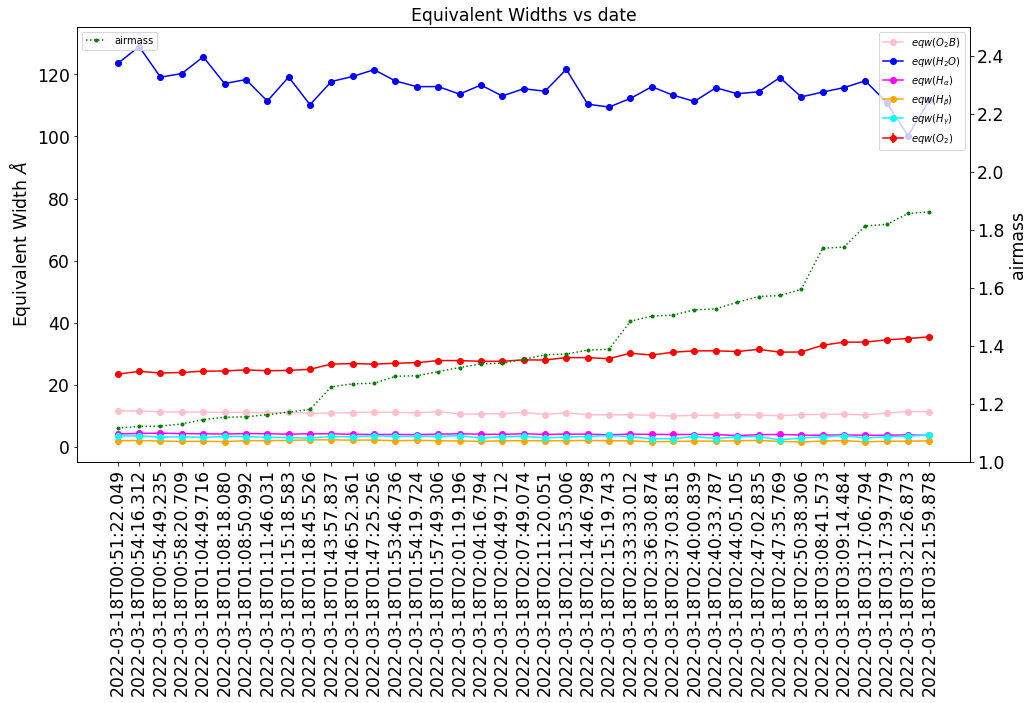

In [46]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
#ax.plot(df_infos['date_obs'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
ax.errorbar(df_infos['date_obs'], df_infos['eqw_o2'],yerr= df_infos['eqw_o2_err'],marker="o",color="red",label="$eqw(O_2)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
ax.plot(df_infos['date_obs'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
ax.plot(df_infos['date_obs'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
ax2.plot(df_infos['date_obs'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass")
ax2.set_ylim(1,2.5)
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

Text(0.5, 1.0, 'Equivalent Widths vs date')

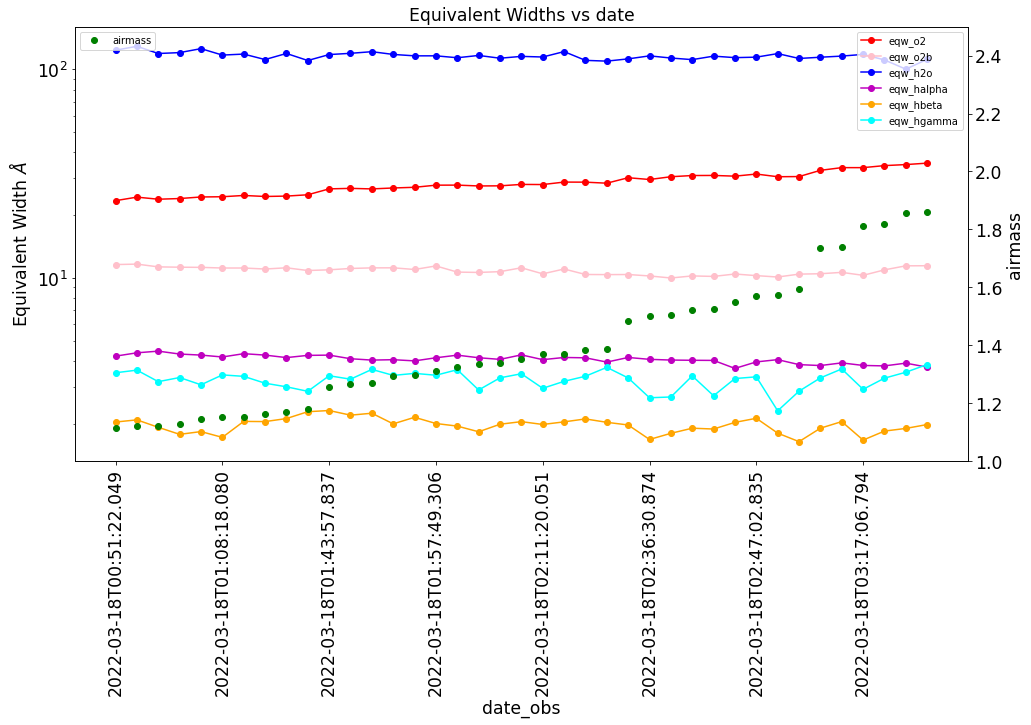

In [37]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
df_infos.plot(ax=ax,x="date_obs", y=["eqw_o2","eqw_o2b","eqw_h2o","eqw_halpha","eqw_hbeta","eqw_hgamma"],color=["r","pink","b","m","orange","cyan"],marker="o");
#plt.gcf().autofmt_xdate(rotation=90) 
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale("log")

ax2 = ax.twinx()
df_infos.plot(ax=ax2,x="date_obs", y="airmass",color=["g"],marker="o",lw=0);
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax2.set_ylim(1,2.5)
ax2.xaxis.set_tick_params(rotation=90)
ax.set_title("Equivalent Widths vs date")



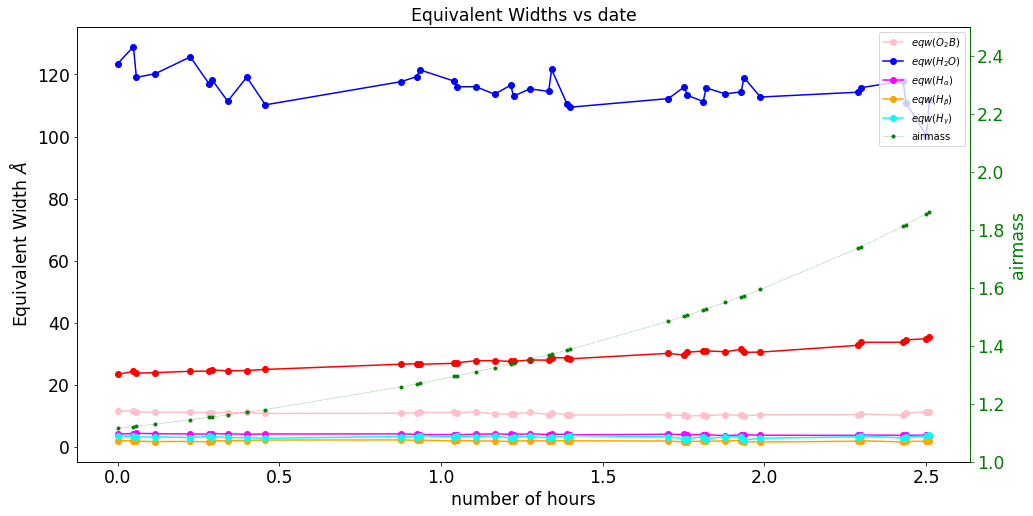

In [40]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$");
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")

ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

curves = [p1, p2, p3, p4,p5,p6]
ax.legend(curves, [c.get_label() for c in curves],loc=1)
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())

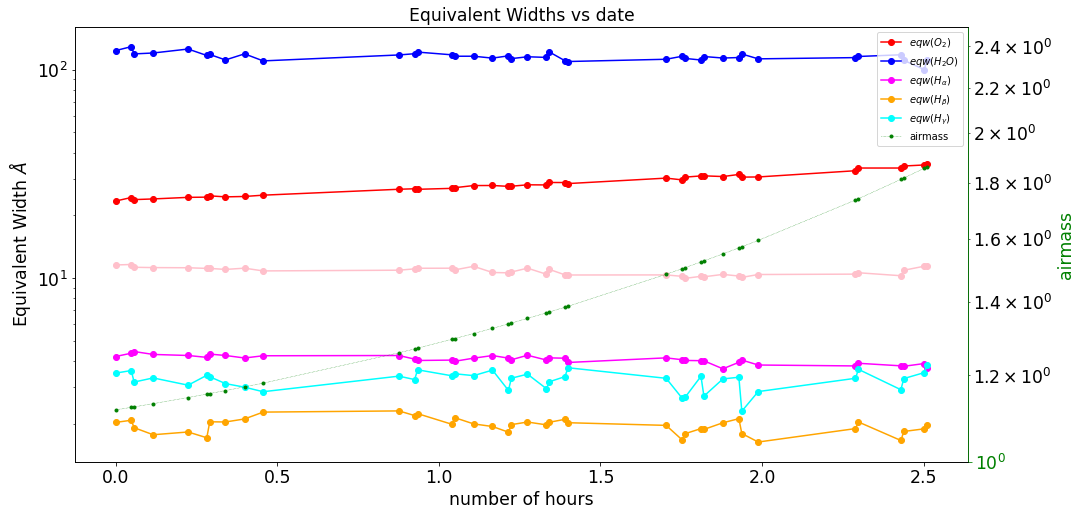

In [42]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$");
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale('log')
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax2.set_yscale('log')
ax.set_title("Equivalent Widths vs date")

curves = [p1, p2, p3, p4, p5, p6]
ax.legend(curves, [c.get_label() for c in curves])
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())


Text(0.5, 1.0, 'Equivalent Widths vs date')

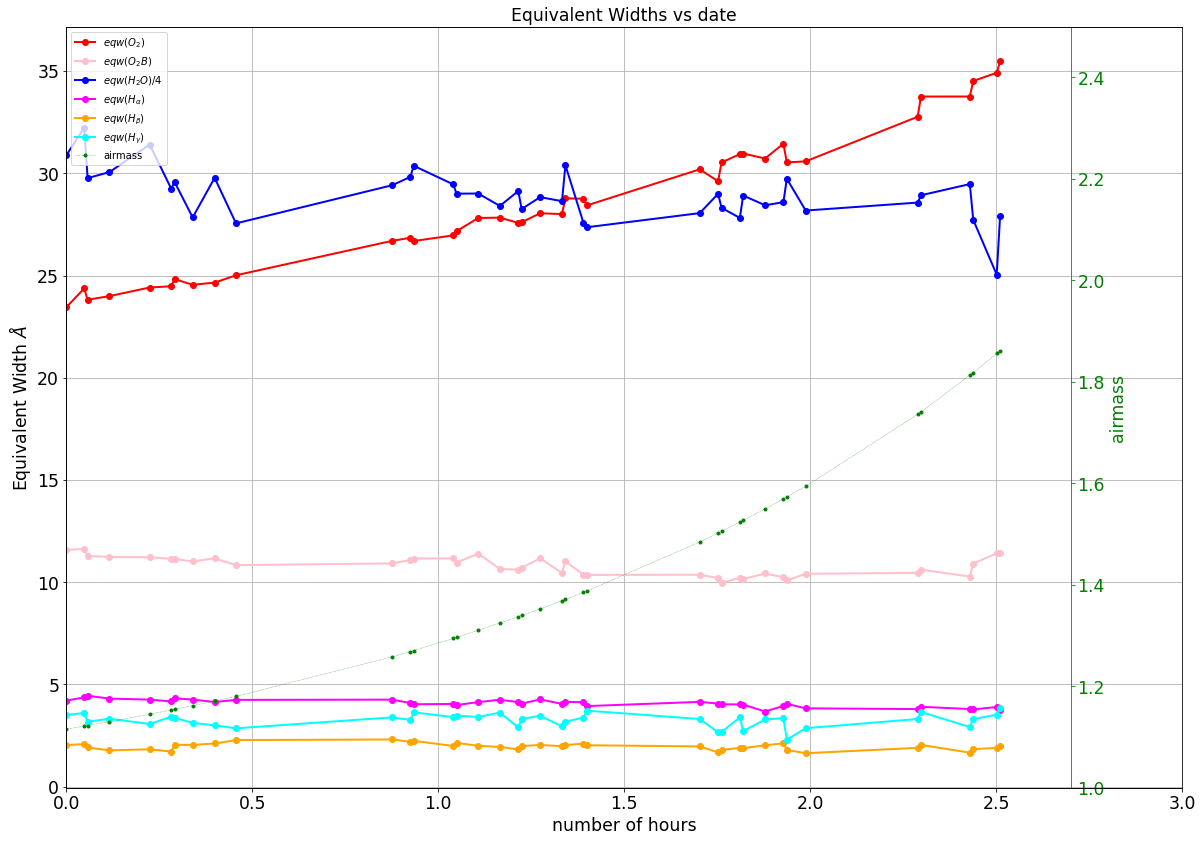

In [47]:
fig=plt.figure(figsize=(20,14))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$",lw=2);
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$",lw=2);
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o']/4,marker="o",color="blue",label="$eqw(H_2O)/4$",lw=2);
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$",lw=2);
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$",lw=2);
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$",lw=2);
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_xlim(0,3)
ax.grid()
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_title("Equivalent Widths vs date")


# airmass
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)
ax2.set_ylabel("airmass")
ax2.spines["right"].set_position(("axes", 0.9))
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())



curves = [p1, p11 ,p2, p3, p4,p5,p6]


ax.legend(curves, [c.get_label() for c in curves],loc=2)
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_title("Equivalent Widths vs date")



Text(0.5, 1.0, 'Equivalent Widths vs date')

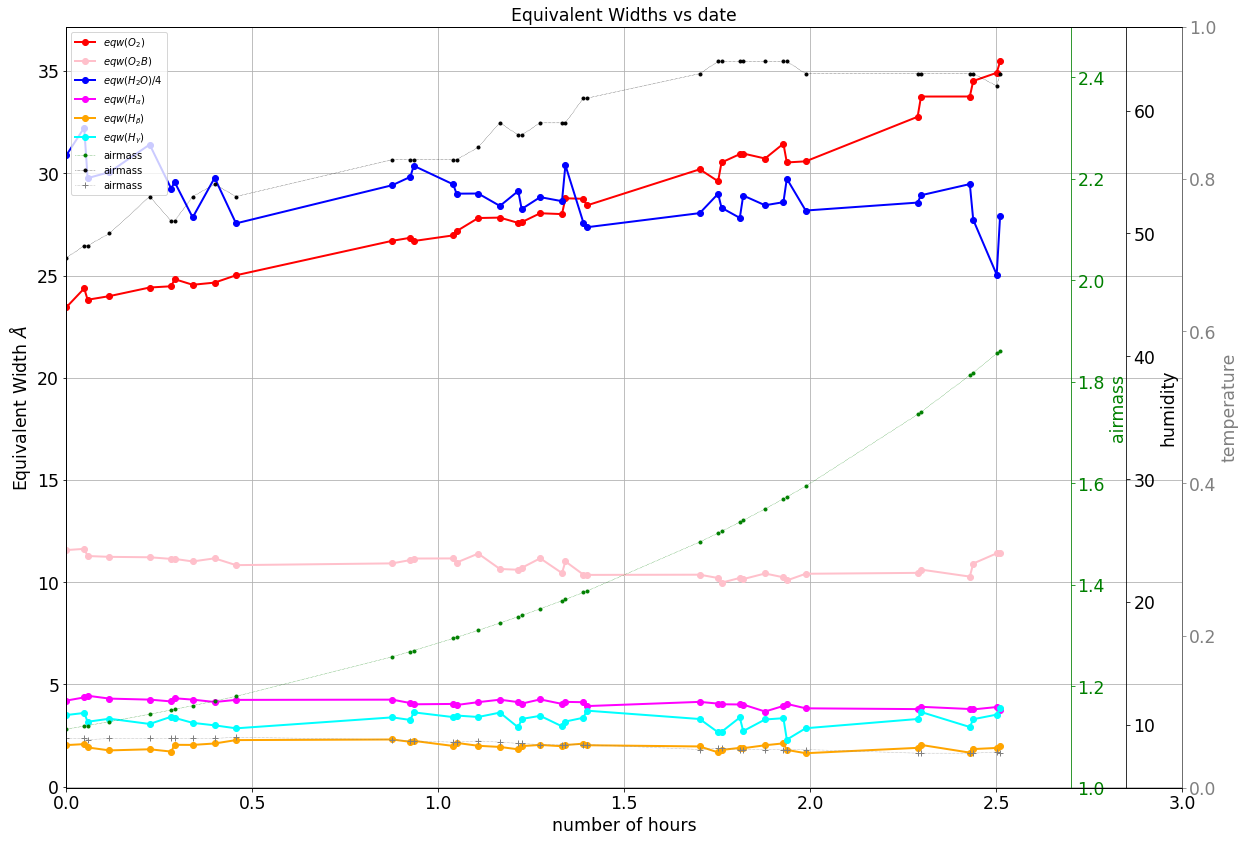

In [43]:
fig=plt.figure(figsize=(20,14))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$",lw=2);
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2B)$",lw=2);
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o']/4,marker="o",color="blue",label="$eqw(H_2O)/4$",lw=2);
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$",lw=2);
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$",lw=2);
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$",lw=2);
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_xlim(0,3)
ax.grid()
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_title("Equivalent Widths vs date")


# airmass
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)
ax2.set_ylabel("airmass")
ax2.spines["right"].set_position(("axes", 0.9))
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())


# humidity
ax3 = ax.twinx()
p7, = ax3.plot(df_infos['reftime'], df_infos['humidity'],linestyle='dotted', marker='.',color="black",label="airmass",lw=0.5)
ax3.set_ylabel("humidity")
ax3.spines["right"].set_position(("axes", 0.95))
ax3.yaxis.label.set_color(p7.get_color())
ax3.spines["right"].set_edgecolor(p7.get_color())
ax3.tick_params(axis='y', colors=p7.get_color())


ax4 = ax.twinx()
p8, = ax3.plot(df_infos['reftime'], df_infos['temperature'],linestyle='dotted', marker='+',color="grey",label="airmass",lw=0.5)
ax4.set_ylabel("temperature")
ax4.spines["right"].set_position(("axes", 1.0))
ax4.yaxis.label.set_color(p8.get_color())
ax4.spines["right"].set_edgecolor(p8.get_color())
ax4.tick_params(axis='y', colors=p8.get_color())


curves = [p1, p11 ,p2, p3, p4,p5,p6, p7, p8]


ax.legend(curves, [c.get_label() for c in curves],loc=2)
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_title("Equivalent Widths vs date")



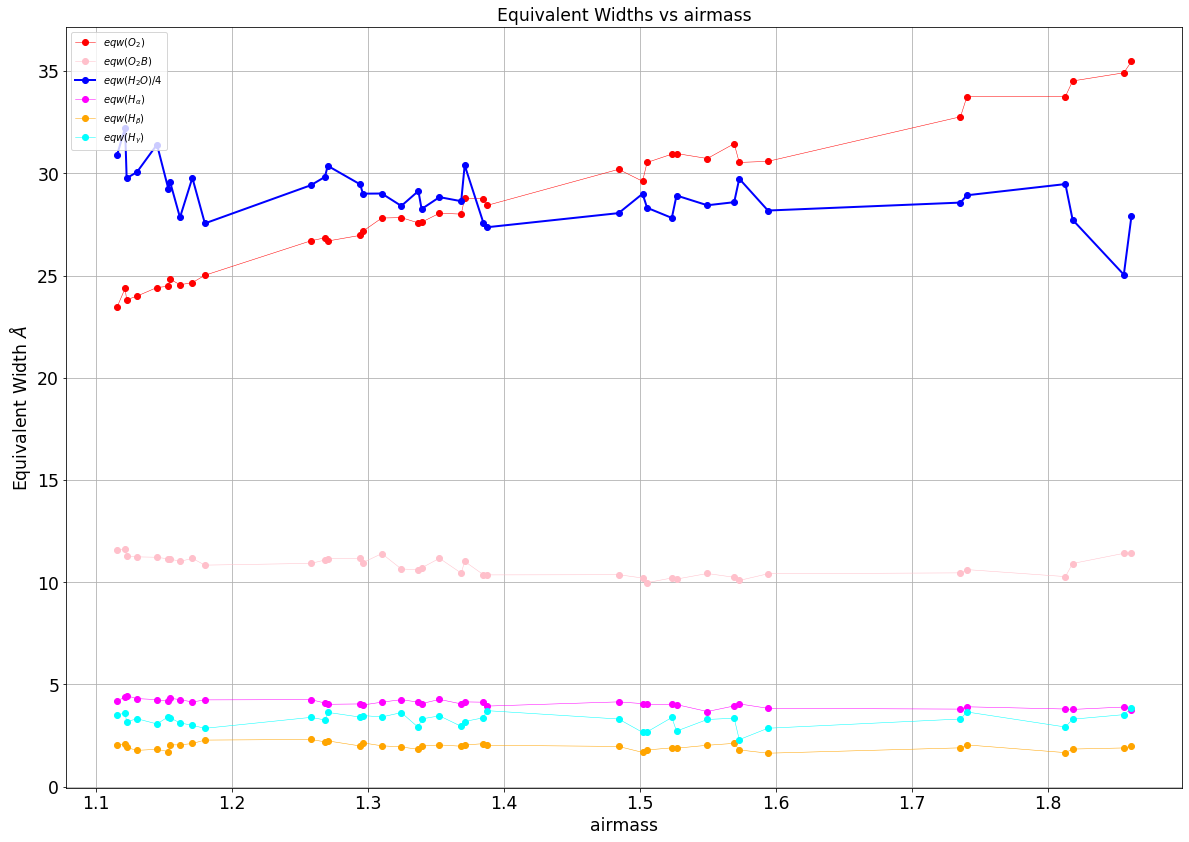

In [45]:
fig=plt.figure(figsize=(20,14))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['airmass'], df_infos['eqw_o2'],marker="o",color="red",lw=0.5,label="$eqw(O_2)$");

p11, = ax.plot(df_infos['airmass'], df_infos['eqw_o2b'],marker="o",color="pink",lw=0.5,label="$eqw(O_2B)$");
p2, = ax.plot(df_infos['airmass'], df_infos['eqw_h2o']/4,marker="o",color="blue",label="$eqw(H_2O)/4$",lw=2);
p3, = ax.plot(df_infos['airmass'], df_infos['eqw_halpha'],marker="o",color="magenta",lw=0.5,label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['airmass'], df_infos['eqw_hbeta'],marker="o",color="orange",lw=0.5,label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['airmass'], df_infos['eqw_hgamma'],marker="o",color="cyan",lw=0.5,label="$eqw(H_{\\gamma})$");
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_xlabel("airmass")
ax.grid()
ax.set_title("Equivalent Widths vs airmass")


curves = [p1, p11,p2, p3, p4,p5]

ax.legend(curves, [c.get_label() for c in curves],loc=2)